<a href="https://colab.research.google.com/github/z1gyy/Data-Analysis/blob/main/credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/z1gyy/Data-Analysis/main/CC%20GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Following is the Data Dictionary for Credit Card dataset:

CUSTID: Identification of Credit Card holder (Categorical)

BALANCE: Balance amount left in their account to make purchases

BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES: Amount of purchases made from account

ONEOFFPURCHASES: Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES: Amount of purchase done in installment

CASHADVANCE: Cash in advance given by the user

PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance being paid

CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"

PURCHASESTRX: Numbe of purchase transactions made

CREDITLIMIT: Limit of Credit Card for user

PAYMENTS: Amount of Payment done by user

MINIMUM_PAYMENTS: Minimum amount of payments made by user

PRCFULLPAYMENT: Percent of full payment paid by user

TENURE: Tenure of credit card service for user

In [40]:
df.isna().sum().sort_values(ascending=False)
df.dropna(inplace=True)

In [64]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,credit_limit_group,purchases_group,tenure_group,TENURE_CATEGORY,tenure_category
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,"[0, 5000)",0,Velmi dlouhodobí zákazníci,0-12 months,9-12 months
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,"[5000, 10000)",0,Velmi dlouhodobí zákazníci,0-12 months,9-12 months
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,"[5000, 10000)",0,Velmi dlouhodobí zákazníci,0-12 months,9-12 months
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,"[0, 5000)",0,Velmi dlouhodobí zákazníci,0-12 months,9-12 months
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,1800.0,1400.057770,2407.246035,0.000000,12,"[0, 5000)",0,Velmi dlouhodobí zákazníci,0-12 months,9-12 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,...,500.0,58.644883,43.473717,0.000000,6,"[0, 5000)",0,Velmi dlouhodobí zákazníci,0-12 months,3-6 months
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,1000.0,325.594462,48.886365,0.500000,6,"[0, 5000)",0,Velmi dlouhodobí zákazníci,0-12 months,3-6 months
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,1000.0,81.270775,82.418369,0.250000,6,"[0, 5000)",0,Velmi dlouhodobí zákazníci,0-12 months,3-6 months
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,500.0,52.549959,55.755628,0.250000,6,"[0, 5000)",0,Velmi dlouhodobí zákazníci,0-12 months,3-6 months


tenure_category
9-12 months    8185
6-9 months      561
3-6 months      204
Name: count, dtype: int64


<ipython-input-92-5af94c1b3fbc>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='tenure_category', palette='viridis')


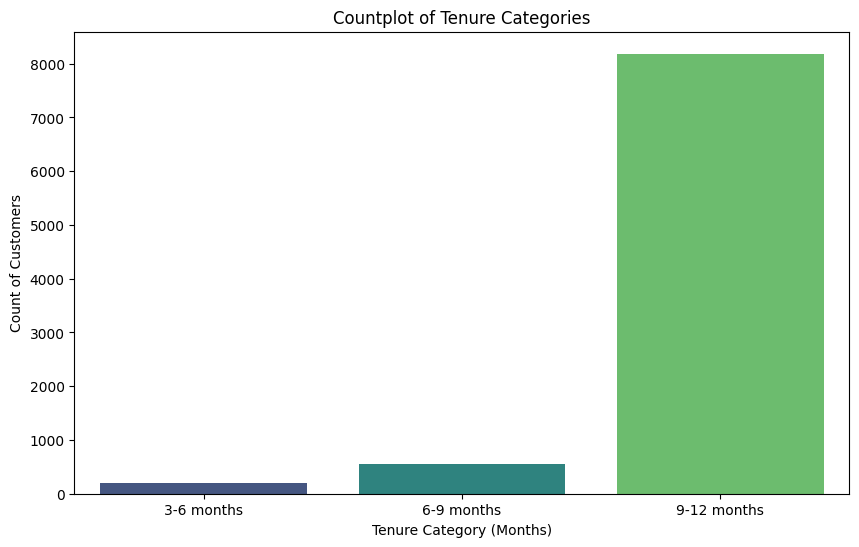

In [92]:
# Define bins and corresponding labels for tenure categories
bins = [3, 6, 9, 12]
labels = ['3-6 months', '6-9 months', '9-12 months']

# Create a new column in the DataFrame for the tenure category
df['tenure_category'] = pd.cut(df['TENURE'], bins=bins, labels=labels)

# Check how many customers are in each category
category_counts = df['tenure_category'].value_counts()
print(category_counts)

# Vytvoření countplot pro kategorie "tenure_category"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tenure_category', palette='viridis')
plt.title('Countplot of Tenure Categories')
plt.xlabel('Tenure Category (Months)')
plt.ylabel('Count of Customers')
plt.show()


purchase_frequency_category
0.8-1      3089
0          2043
0-0.2      1250
0.4-0.6    1087
0.2-0.4     793
0.6-0.8     688
Name: count, dtype: int64


<ipython-input-93-f351de41640f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='purchase_frequency_category', palette='coolwarm')


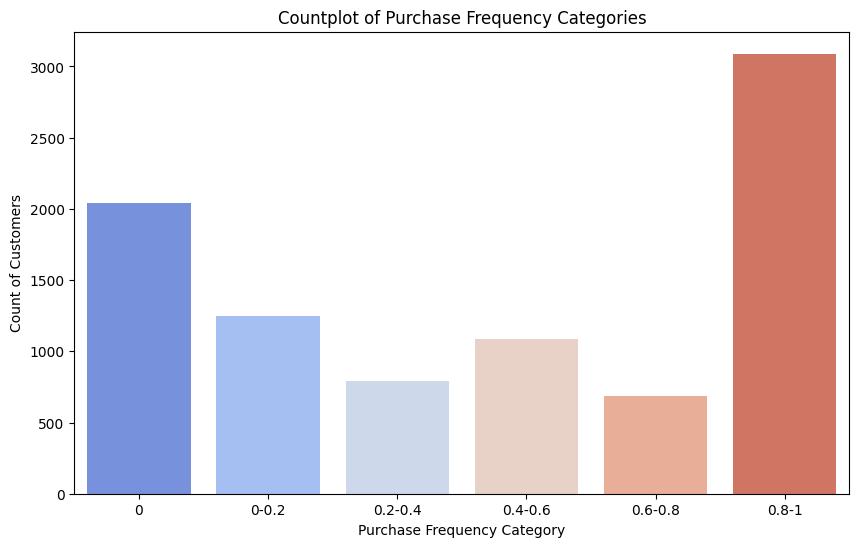

In [93]:
# Define wider bins, with larger intervals
purchase_bins = [-0.01, 0, 0.2, 0.4, 0.6, 0.8, 1]  # Defining larger intervals
purchase_labels = ['0', '0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']  # Corresponding labels

# Create a new column for the purchase frequency category based on the bins
df['purchase_frequency_category'] = pd.cut(df['PURCHASES_FREQUENCY'], bins=purchase_bins, labels=purchase_labels)

# Check how many customers are in each category
purchase_category_counts = df['purchase_frequency_category'].value_counts()
print(purchase_category_counts)

# Vytvoření countplot pro kategorie "purchase_frequency_category"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='purchase_frequency_category', palette='coolwarm')
plt.title('Countplot of Purchase Frequency Categories')
plt.xlabel('Purchase Frequency Category')
plt.ylabel('Count of Customers')
plt.show()

installment_frequency_category
0          3915
0.8-1      2138
0.4-0.6    1002
0.6-0.8     682
0-0.2       641
0.2-0.4     572
Name: count, dtype: int64


<ipython-input-94-cba10152e340>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='installment_frequency_category', palette='viridis')


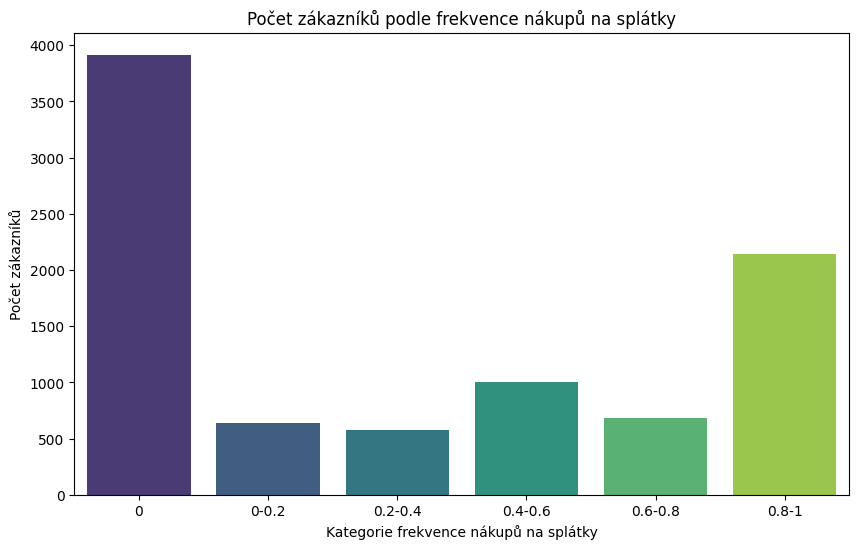

In [94]:
# Define bins for PURCHASESINSTALLMENTSFREQUENCY
installment_bins = [-0.01, 0, 0.2, 0.4, 0.6, 0.8, 1]
installment_labels = ['0', '0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']

# Create a new column in the DataFrame for the installment frequency category
df['installment_frequency_category'] = pd.cut(df['PURCHASES_INSTALLMENTS_FREQUENCY'], bins=installment_bins, labels=installment_labels)

# Check how many customers are in each category
installment_category_counts = df['installment_frequency_category'].value_counts()
print(installment_category_counts)

# Vytvoření countplot pro kategorie "installment_frequency_category"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='installment_frequency_category', palette='viridis')

# Nastavení názvů a titulku grafu
plt.title('Počet zákazníků podle frekvence nákupů na splátky')
plt.xlabel('Kategorie frekvence nákupů na splátky')
plt.ylabel('Počet zákazníků')

# Zobrazení grafu
plt.show()

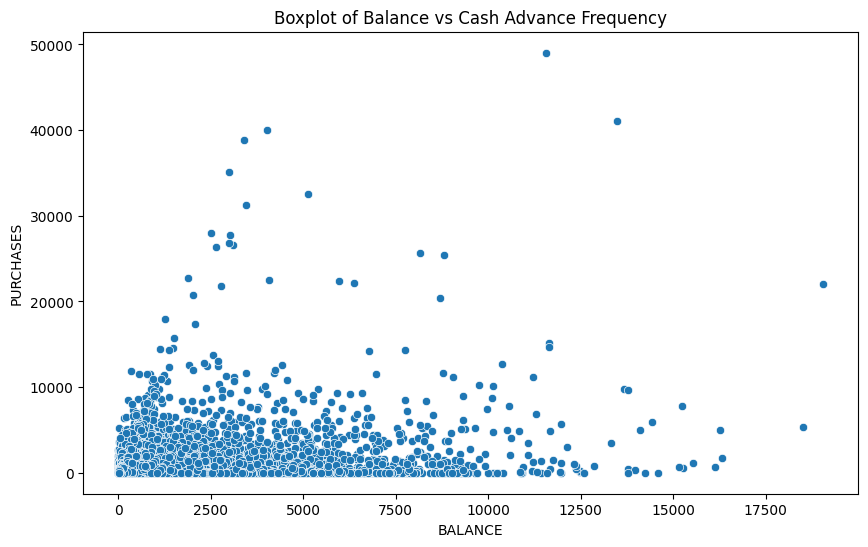

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES')
plt.title('Boxplot of Balance vs Cash Advance Frequency')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.show()

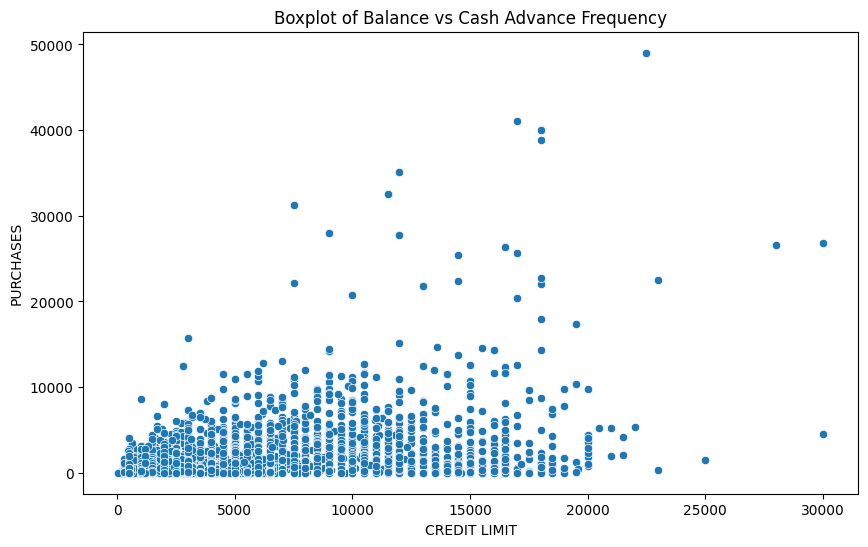

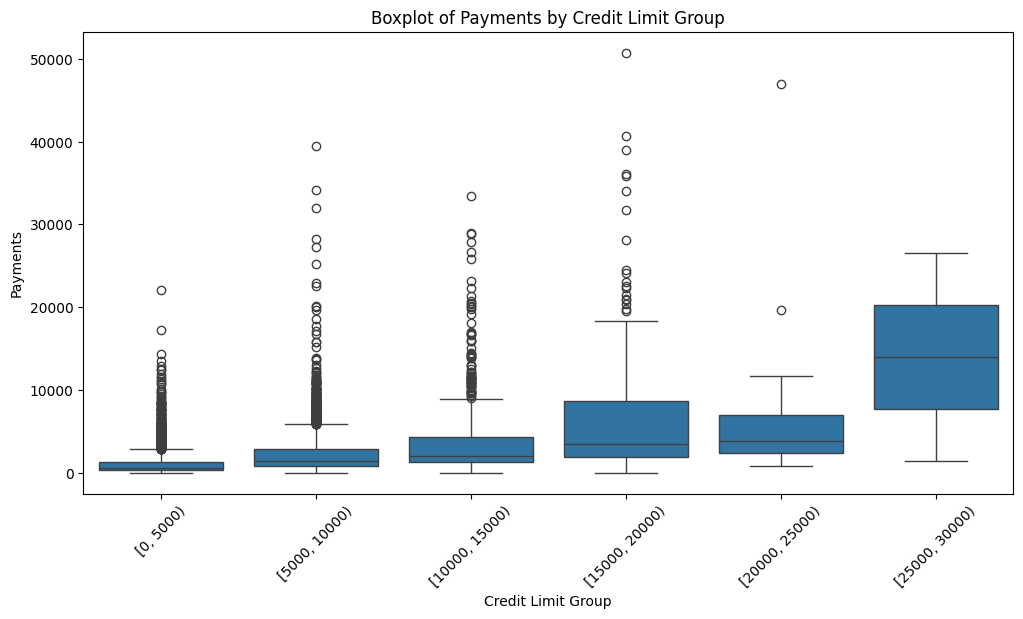

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES')
plt.title('Boxplot of Balance vs Cash Advance Frequency')
plt.xlabel('CREDIT LIMIT')
plt.ylabel('PURCHASES')
plt.show()

# Create bins for CREDIT_LIMIT in steps of 5000
df['credit_limit_group'] = pd.cut(df['CREDIT_LIMIT'], bins=range(0, int(df['CREDIT_LIMIT'].max()) + 5000, 5000), right=False)

# Create a boxplot to compare PAYMENT distributions across CREDIT_LIMIT groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='credit_limit_group', y='PAYMENTS')
plt.title('Boxplot of Payments by Credit Limit Group')
plt.xlabel('Credit Limit Group')
plt.ylabel('Payments')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()
